In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
from scipy.stats import linregress


# Import API key
from config import weather_api_key
from config import g_key

In [2]:
# Define function to run linear regression.
def lin_regress(independent, dependent): 
    
    # Use scipy to calculate values for regression
    mask = ~np.isnan(independent) & ~np.isnan(dependent)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(independent[mask], dependent[mask])
    # Calculate the regression values
    regress_vals = independent*slope + intercept

    # Create string variable that holds the regression line's equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Plot scatter and regression line on top of scatter plot
    plt.scatter(independent, dependent, edgecolors = "black")
    plt.plot(independent, regress_vals, color = "r", label = line_eq)
    plt.legend(loc = "best")
    print(f"The correlation coefficient is {round(rvalue, 2)}")
    print(f"The r-squared value is {round(rvalue**2,2)}")

In [3]:
# Importing csv files and creating data frames

# CO2 by Country
co2_country_df = pd.read_csv("co2_emission.csv")

# GDP by Country (GPD per capita PPP)
gdp_country_df = pd.read_csv("GDP-countries-1990-2018.csv")



In [4]:
# Checking column names and getting rid of any spaces for gdp dataframe
gdp_country_df.head()
gdp_country_df.columns

gdp_country_df = gdp_country_df.rename(columns = {"Country " : "Country"})

In [5]:
# Taking a subset of original gdp data frame for only the year 2016 and
gdp_country_2016_df = gdp_country_df[["Country", "2016"]]

# Renaming column
gdp_country_2016_df = gdp_country_2016_df.rename(columns = {"2016" : "gdp_2016"})
gdp_country_2016_df.head()

,Country,gdp_2016
0,Aruba,38390.271650
1,Afghanistan,1896.992520
2,Angola,6756.935074
3,Albania,11868.178970
4,Arab World,16935.383300


In [6]:
# Checking column names for co2 emissions dataframe
co2_country_df.head()
co2_country_df.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )'], dtype='object')

In [7]:
# Checking for strange observations 
co2_country_df.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas (other)',
       'Andorra', 'Angola', 'Anguilla', 'Antarctic Fisheries',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia and Pacific (other)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Republic of the Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Republic of the Congo', 'Denmark',
 

In [8]:
# Removing any strange observations found

co2_country_df = co2_country_df[(co2_country_df.Entity != 'Africa') &
                                (co2_country_df.Entity != 'Americas (other)') &
                                (co2_country_df.Entity != 'Antarctic Fisheries') &
                                (co2_country_df.Entity != 'Asia and Pacific (other)') &
                                (co2_country_df.Entity != 'EU-28') &
                                (co2_country_df.Entity != 'Europe (other)') &
                                (co2_country_df.Entity != 'International transport') &
                                (co2_country_df.Entity != 'Statistical differences') &
                                (co2_country_df.Entity != 'World')]


In [9]:
# Double checking that observations were removed
co2_country_df.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Republic of the Congo', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salva

In [10]:
# Only keeping observation years 1991 and onwards
co2_country_df = co2_country_df.loc[(co2_country_df.Year >= 1991), :]
co2_country_df = co2_country_df.rename(columns = {"Entity" : "Country", "Annual CO₂ emissions (tonnes )" : "annual_co2_tonnes"})
co2_country_df.head()

,Country,Code,Year,annual_co2_tonnes
42,Afghanistan,AFG,1991,2426486.16
43,Afghanistan,AFG,1992,1381521.84
44,Afghanistan,AFG,1993,1333837.11
45,Afghanistan,AFG,1994,1282488.38
46,Afghanistan,AFG,1995,1231139.65


In [11]:
co2_country_2016_df = co2_country_df.loc[(co2_country_df.Year == 2016), :]


In [12]:
co2_country_2016_df.head(10)

,Country,Code,Year,annual_co2_tonnes
67,Afghanistan,AFG,2016,1.225791e+07
419,Albania,ALB,2016,6.272858e+06
527,Algeria,DZA,2016,1.503780e+08
822,Andorra,AND,2016,5.115068e+05
890,Angola,AGO,2016,3.535100e+07
918,Anguilla,AIA,2016,1.520722e+05
1000,Antigua and Barbuda,ATG,2016,5.653968e+05
1131,Argentina,ARG,2016,2.070641e+08
1190,Armenia,ARM,2016,5.960813e+06
1249,Aruba,ABW,2016,9.280306e+05


In [13]:
co2_gdp_merge_df = co2_country_2016_df.merge(gdp_country_2016_df, how = 'left', on = "Country")
co2_gdp_merge_df.head(10)

,Country,Code,Year,annual_co2_tonnes,gdp_2016
0,Afghanistan,AFG,2016,1.225791e+07,1896.992520
1,Albania,ALB,2016,6.272858e+06,11868.178970
2,Algeria,DZA,2016,1.503780e+08,15036.364150
3,Andorra,AND,2016,5.115068e+05,NaN
4,Angola,AGO,2016,3.535100e+07,6756.935074
5,Anguilla,AIA,2016,1.520722e+05,NaN
6,Antigua and Barbuda,ATG,2016,5.653968e+05,23670.302260
7,Argentina,ARG,2016,2.070641e+08,20130.408030
8,Armenia,ARM,2016,5.960813e+06,8808.572714
9,Aruba,ABW,2016,9.280306e+05,38390.271650


The correlation coefficient is 0.09
The r-squared value is 0.01


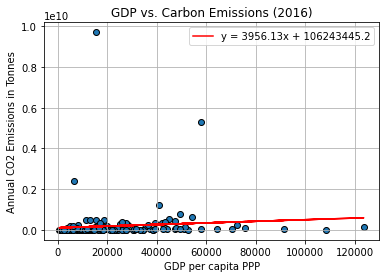

In [14]:
lin_regress(co2_gdp_merge_df.gdp_2016, co2_gdp_merge_df.annual_co2_tonnes)

plt.title("GDP vs. Carbon Emissions (2016)")
plt.xlabel("GDP per capita PPP")
plt.ylabel("Annual CO2 Emissions in Tonnes")
plt.grid(True)
plt.show()

In [15]:
# Creating empty columns
co2_gdp_merge_df['Lat'] = ""
co2_gdp_merge_df['Lng'] = ""

# Geocode
for index, row in co2_gdp_merge_df.iterrows():
    
    country = row.Country
    
    # Build the endpoint URL
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={g_key}"
    try:
        # Get json and extract latitude and longitude
        geo_data = requests.get(target_url).json()
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        co2_gdp_merge_df.loc[index, 'Lat'] = lat
        co2_gdp_merge_df.loc[index, 'Lng'] = lng
        print(f"{country} found, adding coordinates")
    except:
        
        print("Could not find country.")

    
    #print(json.dumps(geo_data, indent = 4, sort_keys = True))
co2_gdp_merge_df.head()

Afghanistan found, adding coordinates
Albania found, adding coordinates
Algeria found, adding coordinates
Andorra found, adding coordinates
Angola found, adding coordinates
Anguilla found, adding coordinates
Antigua and Barbuda found, adding coordinates
Argentina found, adding coordinates
Armenia found, adding coordinates
Aruba found, adding coordinates
Australia found, adding coordinates
Austria found, adding coordinates
Azerbaijan found, adding coordinates
Bahamas found, adding coordinates
Bahrain found, adding coordinates
Bangladesh found, adding coordinates
Barbados found, adding coordinates
Belarus found, adding coordinates
Belgium found, adding coordinates
Belize found, adding coordinates
Benin found, adding coordinates
Bermuda found, adding coordinates
Bhutan found, adding coordinates
Bolivia found, adding coordinates
Bonaire Sint Eustatius and Saba found, adding coordinates
Bosnia and Herzegovina found, adding coordinates
Botswana found, adding coordinates
Brazil found, adding 

,Country,Code,Year,annual_co2_tonnes,gdp_2016,Lat,Lng
0,Afghanistan,AFG,2016,1.225791e+07,1896.992520,33.9391,67.71
1,Albania,ALB,2016,6.272858e+06,11868.178970,41.1533,20.1683
2,Algeria,DZA,2016,1.503780e+08,15036.364150,28.0339,1.65963
3,Andorra,AND,2016,5.115068e+05,NaN,42.5063,1.5218
4,Angola,AGO,2016,3.535100e+07,6756.935074,-11.2027,17.8739


In [ ]:
co2_gdp_merge_df.head(50)

In [16]:
# Store lat and long in locations, gdps in gdps, and carbon emissions in carbons
locations = co2_gdp_merge_df[["Lat", "Lng"]]
gdps = co2_gdp_merge_df.gdp_2016
carbons = co2_gdp_merge_df.annual_co2_tonnes

In [17]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Create heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=gdps, 
                                 dissipating=False, max_intensity=max(gdps),
                                 point_radius=5)



fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
# Configure gmaps
gmaps.configure(api_key=g_key)

# Create heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=carbons, 
                                 dissipating=False, max_intensity=1*(10**9),
                                 point_radius=5)



fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [86]:
# Import BRIC Historic climate csv into pandas dataframe
bric_climate_df = pd.read_csv("BRIC-climate-1991-2016.csv")
bric_climate_df.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,25.6309,1991,Jan Average,Brazil,BRA
1,25.9331,1991,Feb Average,Brazil,BRA
2,25.6195,1991,Mar Average,Brazil,BRA
3,25.3122,1991,Apr Average,Brazil,BRA
4,24.6685,1991,May Average,Brazil,BRA


In [87]:
# Checking column names and fixing irregularities
bric_climate_df.columns

bric_climate_df = bric_climate_df.rename(columns = {"Temperature - (Celsius)" : "Temperature_C",
                                                    " Year" : "Year",
                                                    " Statistics" : "Statistics",
                                                    " Country" : "Country",
                                                    " ISO3" : "Code"})

bric_climate_df = bric_climate_df[["Country", "Year", "Code", "Temperature_C"]]
bric_climate_df.head()

,Country,Year,Code,Temperature_C
0,Brazil,1991,BRA,25.6309
1,Brazil,1991,BRA,25.9331
2,Brazil,1991,BRA,25.6195
3,Brazil,1991,BRA,25.3122
4,Brazil,1991,BRA,24.6685


In [89]:
# Groupby country and year to get max

bric_groupby = bric_climate_df.groupby(by = ["Country", "Year"])
bric_max_temp = bric_groupby.max()
bric_max_temp.head(40)

bric_max_temp[["Temperature_C", "Code"]].head()

#bric_max_temp.loc[(' Brazil', 1991), :]

Temperature_C  Code
Country Year                     
 Brazil 1991        26.0139   BRA
        1992        25.7539   BRA
        1993        26.0299   BRA
        1994        26.1762   BRA
        1995        26.1650   BRA

In [93]:
# Resetting index of BRIC temperature dataframe
bric_temp_df = bric_max_temp.reset_index()

# Removing leading space in country and code values of BRIC dataframe
bric_temp_df.Country = [country.strip() for country in bric_temp_df.Country]
bric_temp_df.Code = [code.strip() for code in bric_temp_df.Code]

#bric_temp_df.Country = bric_temp_df.Country.astype(str)
#bric_temp_df.Year = bric_temp_df.Year.astype(int)

#co2_country_df.Country = co2_country_df.Country.astype(str)
#co2_country_df.Year = co2_country_df.Year.astype(int)

In [71]:
#co2_country_df.loc[(co2_country_df.Country == 'Brazil') | (co2_country_df.Country == 'Russia'), :]

In [94]:
# Merging BRIC emissions with BRIC temperatures
bric_merge_df = bric_temp_df.merge(co2_country_df, how = 'left', on = ['Country', 'Year', 'Code'])

In [96]:
bric_merge_df.head()

,Country,Year,Code,Temperature_C,annual_co2_tonnes
0,Brazil,1991,BRA,26.0139,217227472.0
1,Brazil,1992,BRA,25.7539,218383504.0
2,Brazil,1993,BRA,26.0299,228333216.0
3,Brazil,1994,BRA,26.1762,239470720.0
4,Brazil,1995,BRA,26.1650,255583376.0


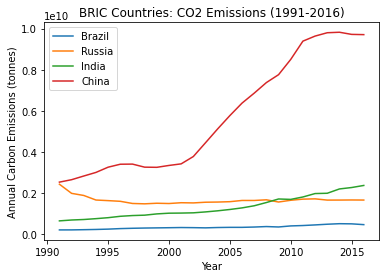

In [99]:
# Line Plot for Carbon Emmissions

# Subset data for countries
brazil_df = bric_merge_df.loc[bric_merge_df.Country == "Brazil", :]
russia_df = bric_merge_df.loc[bric_merge_df.Country == "Russia", :]
india_df = bric_merge_df.loc[bric_merge_df.Country == "India", :]
china_df = bric_merge_df.loc[bric_merge_df.Country == "China", :]

# Plotting lines
plt.plot(brazil_df.Year, brazil_df.annual_co2_tonnes, label = "Brazil")
plt.plot(russia_df.Year, russia_df.annual_co2_tonnes, label = "Russia")
plt.plot(india_df.Year, india_df.annual_co2_tonnes, label = "India")
plt.plot(china_df.Year, china_df.annual_co2_tonnes, label = "China")
plt.legend(loc = "best")
plt.title("BRIC Countries: CO2 Emissions (1991-2016)")
plt.xlabel("Year")
plt.ylabel("Annual Carbon Emissions (tonnes)")
plt.show()

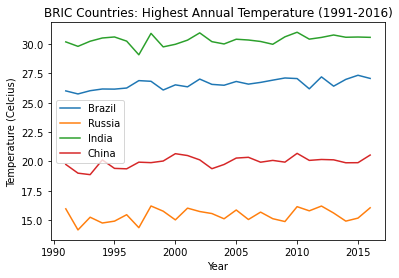

In [100]:
# Line Plot for Annual Max Temperature

# Plotting lines
plt.plot(brazil_df.Year, brazil_df.Temperature_C, label = "Brazil")
plt.plot(russia_df.Year, russia_df.Temperature_C, label = "Russia")
plt.plot(india_df.Year, india_df.Temperature_C, label = "India")
plt.plot(china_df.Year, china_df.Temperature_C, label = "China")
plt.legend(loc = "best")
plt.title("BRIC Countries: Highest Annual Temperature (1991-2016)")
plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.show()

Please select a year between 1991 and 2016:2016


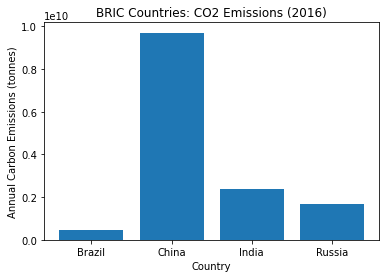

In [104]:
# BarPlot of Carbon Emissions for a Given Year

# Get user input for year of interest
year_of_interest = input("Please select a year between 1991 and 2016:")

# Subset data for given year
bar_data = bric_merge_df.loc[bric_merge_df.Year == int(year_of_interest), :]

# Creating barplot
plt.bar(bar_data.Country, bar_data.annual_co2_tonnes)
plt.title(f"BRIC Countries: CO2 Emissions ({year_of_interest})")
plt.xlabel("Country")
plt.ylabel("Annual Carbon Emissions (tonnes)")
plt.show()